# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas-docs.github.io/pandas-docs-travis/io.html#json
+ data source: http://jsonstudio.com/resources/
****

In [17]:
import pandas as pd

## imports for Python, Pandas

In [18]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas-docs.github.io/pandas-docs-travis/io.html#normalization

In [19]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [20]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [21]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [22]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [23]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [24]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [25]:
#Exercise 1: Find the 10 countries with most projects

df_alldata= pd.read_json('data/world_bank_projects.json') #read the file with pandas

countrynames=df_alldata.groupby(['countryname']).size() # group the number of times each country name appears in the Series

inorder=countrynames.order(ascending=False) # Sort that series. Infor about .order() comand: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.order.html
topten=inorder.head(10)
topten

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

In [78]:
#Exercise 2: Find the top 10 major project themes (using column 'mjtheme_namecode')

data2=json.load((open('data/world_bank_projects.json')))
data3=json_normalize(data2)

def get_theme_code_names(theme_values):
    """Returns a DataFrame with columns Code and Name"""
    return pd.DataFrame(theme_values)

# For each row, Split into Code and Name columns
dfs = data3['mjtheme_namecode'].map(get_theme_code_names) 

# This can also be done as a single lambda expression as follows
# dfs = data3['mjtheme_namecode'].map(lambda theme_values: pd.DataFrame(theme_values))

# Concanate ALL the Data Frames into one DataFrame
codename=pd.concat(df for df in dfs)

# Build a dictionary with each code and its corresponding project name
code1 = codename[codename.code=="1"].iloc[0][1]
code2 = codename[codename.code=="2"].iloc[0][1]
code3 = codename[codename.code=="3"].iloc[0][1]
code4 = codename[codename.code=="4"].iloc[0][1]
code5 = codename[codename.code=="5"].iloc[0][1]
code6 = codename[codename.code=="6"].iloc[0][1]
code7 = codename[codename.code=="7"].iloc[0][1]
code8 = codename[codename.code=="8"].iloc[0][1]
code9 = codename[codename.code=="9"].iloc[0][1]
code10 = codename[codename.code=="10"].iloc[0][1]
code11 = codename[codename.code=="11"].iloc[1][1]

dic={"1":code1,"2":code2, "3":code3, "4":code4, "5":code5,"6":code6,"7":code7, "8":code8, "9":code9, "10":code10, "11":code11 }
dic

{'1': u'Economic management',
 '10': u'Rural development',
 '11': u'Environment and natural resources management',
 '2': u'Public sector governance',
 '3': u'Rule of law',
 '4': u'Financial and private sector development',
 '5': u'Trade and integration',
 '6': u'Social protection and risk management',
 '7': u'Social dev/gender/inclusion',
 '8': u'Human development',
 '9': u'Urban development'}

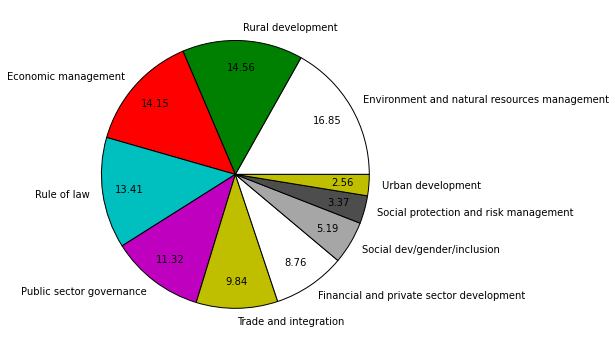

In [77]:
#Ploting the ten major project themes to make it more visual. 
codename["code"].value_counts().head(10).plot(kind='pie', labels=dic.values(),   labeldistance=1.1, pctdistance=0.8, colors=['w','g','r','c','m','y','w','0.65','0.3','y'], autopct='%.2f', figsize=(6, 6))


In [28]:
tenmajorprojects=codename["code"].value_counts().head(10)

In [33]:
al=codename[codename.code=="11"]
#al[al.name=='']
al

,code,name
1,11,
2,11,Environment and natural resources management
0,11,Environment and natural resources management
3,11,Environment and natural resources management
1,11,Environment and natural resources management
1,11,Environment and natural resources management
0,11,Environment and natural resources management
1,11,Environment and natural resources management
2,11,Environment and natural resources management
0,11,Environment and natural resources management


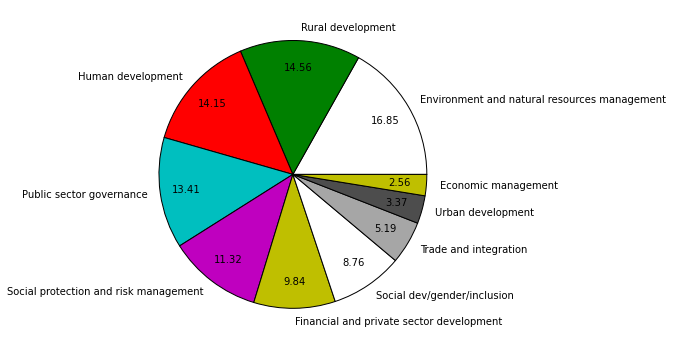

In [74]:
#Exercise 3: In 2. above you will notice that some entries have only the code and the name is missing. 
#Create a dataframe with the missing names filled in.


#grouping all the codes and project theme names by code:
miss1=codename[codename.code=="1"]
miss2=codename[codename.code=="2"]
miss3=codename[codename.code=="3"]
miss4=codename[codename.code=="4"]
miss5=codename[codename.code=="5"]
miss6=codename[codename.code=="6"]
miss7=codename[codename.code=="7"]
miss8=codename[codename.code=="8"]
miss9=codename[codename.code=="9"]
miss10=codename[codename.code=="10"]
miss11=codename[codename.code=="11"]

#useing .replace() function to avoid missing values.
nonmiss1=miss1.replace({"name":[""]},{"name":["Economic management"]})
nonmiss2=miss2.replace({"name":[""]},{"name":["Public sector governance"]})
nonmiss3=miss3.replace({"name":[""]},{"name":["Rule of law"]})
nonmiss4=miss4.replace({"name":[""]},{"name":["Financial and private sector development"]})
nonmiss5=miss5.replace({"name":[""]},{"name":["Trade and integration"]})
nonmiss6=miss6.replace({"name":[""]},{"name":["Social protection and risk management"]})
nonmiss7=miss7.replace({"name":[""]},{"name":["Social dev/gender/inclusion"]})
nonmiss8=miss8.replace({"name":[""]},{"name":["Human development"]})
nonmiss9=miss9.replace({"name":[""]},{"name":["Urban development"]})
nonmiss10=miss10.replace({"name":[""]},{"name":["Rural development"]})
nonmiss11=miss11.replace({"name":[""]},{"name":["Environment and natural resources management"]})

#Concanate ALL the Data Frames into one DataFrame
DF_final=[nonmiss1,nonmiss2,nonmiss3,nonmiss4,nonmiss5,nonmiss6,nonmiss7,nonmiss8,nonmiss9,nonmiss10,nonmiss11]
result = pd.concat(DF_final)



#Plot the 10 major project themes but now using the column "names" to ensure all the names have been replaced correctly.
result["name"].value_counts().head(10).plot(kind='pie', labeldistance=1.1, pctdistance=0.8, colors=['w','g','r','c','m','y','w','0.65','0.3','y'], autopct='%.2f', figsize=(6, 6))


In [75]:
result

,code,name
0,1,Economic management
1,1,Economic management
1,1,Economic management
2,1,Economic management
3,1,Economic management
1,1,Economic management
2,1,Economic management
1,1,Economic management
0,1,Economic management
0,1,Economic management
